# 맷플롯립을 이용한 시각화

##  산포도 그리기 

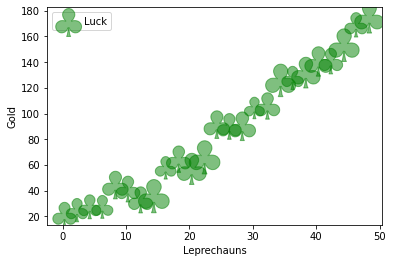

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$', label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

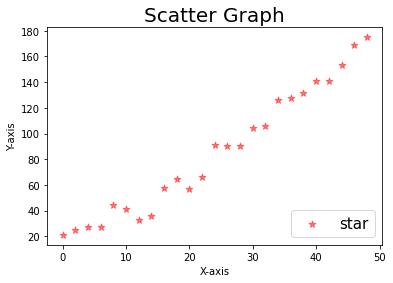

In [2]:
plt.scatter(x, y, s=50, c="r", alpha=0.5, marker="*", label="star")
plt.title("Scatter Graph", fontsize=20)
plt.xlabel("X-axis", fontsize=10)
plt.ylabel("Y-axis", fontsize=10)
plt.legend(loc='lower right', fontsize=15)
plt.show()

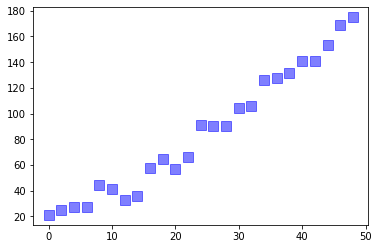

In [3]:
plt.scatter(x, y, s=100, c="b", alpha=0.5, marker="s", label="square")
plt.show()

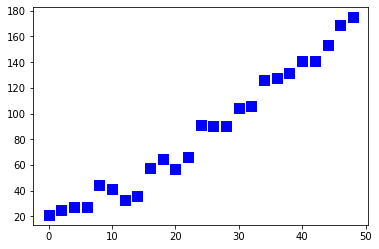

In [4]:
plt.scatter(x, y, s=100, c="b", alpha=1.0, marker=",", label="pixel")
plt.show()

## 색상표 만들기

### https://matplotlib.org/examples/color/named_colors.html

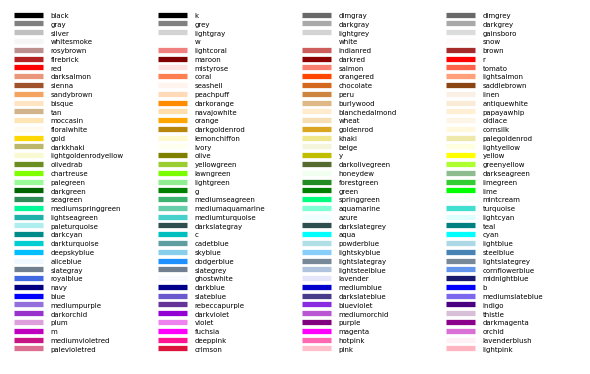

In [5]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()


## 선 그래프 그리기

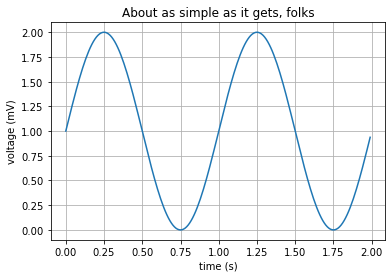

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

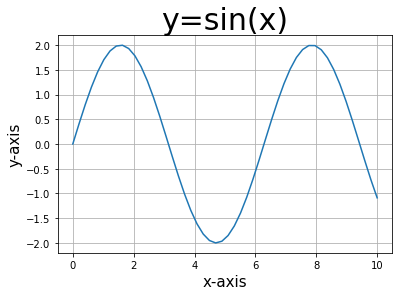

In [7]:
x = np.linspace(0, 10)
y = np.sin(x)*2

plt.title("y=sin(x)", fontsize=30)
plt.xlabel("x-axis", fontsize=15)
plt.ylabel("y-axis", fontsize=15)

plt.plot(x, y)
plt.grid()
plt.show()    

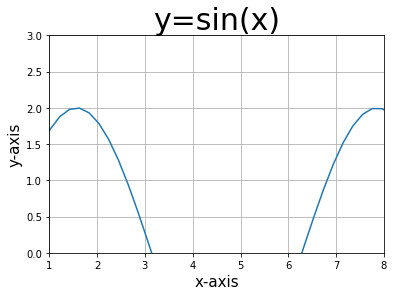

In [8]:
x = np.linspace(0, 10)
y = np.sin(x)*2

plt.title("y=sin(x)", fontsize=30)
plt.xlabel("x-axis", fontsize=15)
plt.ylabel("y-axis", fontsize=15)

plt.xlim(1,8)
plt.ylim(0,3)

plt.plot(x, y)
plt.grid()
plt.show()    

## 여러 개 그래프 그리기

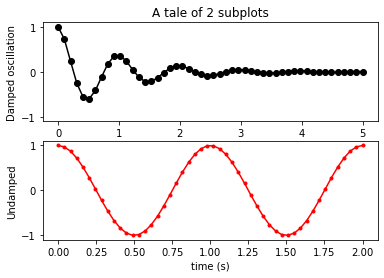

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')

plt.show()

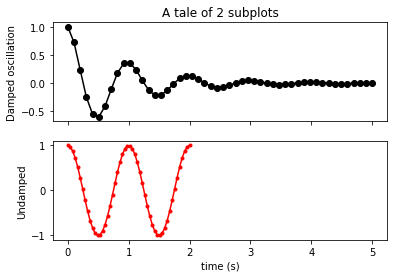

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Create two subplots sharing x axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')

plt.show()

# 학습과정 살펴보기

In [11]:
# 1. 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [12]:
# 2. 데이터셋 준비하기

# train과 test 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# train과 validation 데이터셋 분리하기 (순서 중요)
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 (정규화)
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 정답 데이터셋 원핫인코딩 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [13]:
# 3. 모델 구성하기

model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [14]:
# 4. 모델 학습과정 설정하기

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
# 5. 모델 학습시키기

history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.6200 - accuracy: 0.3884 - val_loss: 1.3224 - val_accuracy: 0.4666
Epoch 2/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.2969 - accuracy: 0.4950 - val_loss: 1.2377 - val_accuracy: 0.5103
Epoch 3/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.2487 - accuracy: 0.5223 - val_loss: 1.2051 - val_accuracy: 0.5486
Epoch 4/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.2246 - accuracy: 0.5405 - val_loss: 1.1783 - val_accuracy: 0.5569
Epoch 5/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.2104 - accuracy: 0.5460 - val_loss: 1.1704 - val_accuracy: 0.5521
Epoch 6/100
50000/50000 [==============================] - 4s 80us/step - loss: 1.1999 - accuracy: 0.5533 - val_loss: 1.1606 - val_accuracy: 0.5606
Epoch 7/100
50000/50000 [==============================] - 4s 

Epoch 56/100
50000/50000 [==============================] - 4s 77us/step - loss: 1.1020 - accuracy: 0.6480 - val_loss: 1.0718 - val_accuracy: 0.6500
Epoch 57/100
50000/50000 [==============================] - 4s 74us/step - loss: 1.1011 - accuracy: 0.6473 - val_loss: 1.0628 - val_accuracy: 0.6613
Epoch 58/100
50000/50000 [==============================] - 4s 72us/step - loss: 1.1017 - accuracy: 0.6456 - val_loss: 1.0792 - val_accuracy: 0.6531
Epoch 59/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.1014 - accuracy: 0.6476 - val_loss: 1.0756 - val_accuracy: 0.6509
Epoch 60/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.0996 - accuracy: 0.6476 - val_loss: 1.0688 - val_accuracy: 0.6503
Epoch 61/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.1008 - accuracy: 0.6481 - val_loss: 1.0745 - val_accuracy: 0.6635
Epoch 62/100
50000/50000 [==============================] - 4s 78us/step - loss: 1.1001 - accuracy: 0.6497

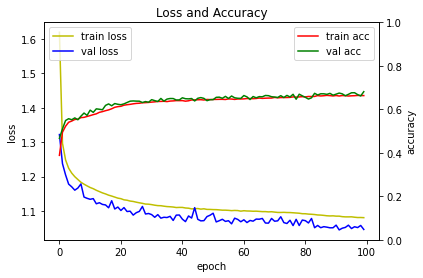

In [16]:
# 6. 모델 학습과정 살펴보기 

# 방법(1)

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# 손실과 정확도: train 데이터셋
loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
acc_ax.plot(history.history['accuracy'], 'r', label = 'train acc')

plt.ylim([0,1])

# 손실과 정확도: validation 데이터셋
loss_ax.plot(history.history['val_loss'], 'b', label='val loss')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set(xlabel='epoch', ylabel='loss', title='')
acc_ax.set(xlabel='', ylabel='accuracy', title='')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.title('Loss and Accuracy')

plt.show()

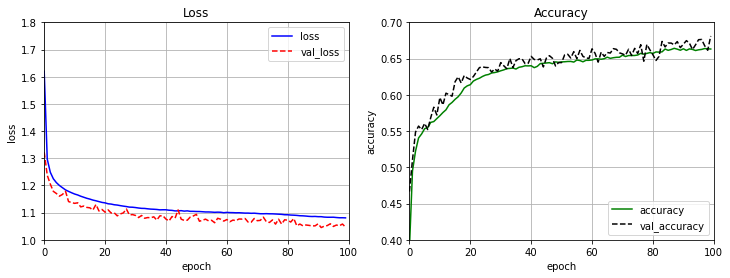

In [17]:
# 방법 (2)

# 그래프 사이즈 지정
plt.figure(figsize=(12,4))

# 손실 그래프 그리기 (왼쪽)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='', color="blue", linestyle='-', label='loss')
plt.plot(history.history['val_loss'], marker='', color="red", linestyle='--', label='val_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.title('Loss')
plt.legend(loc='upper right')
plt.axis([0, 100, 1, 1.8])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


# 정확도 그래프 그리기 (오른쪽)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], marker='', color='g', linestyle='-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], marker='', color='k', linestyle='--', label = 'val_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.axis([0, 100, 0.4, 0.7])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()